# **Project By Abdullah Awan (21L-5663) & Soha Bilal (21L-6258)**

# **Data Scraping**

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

def scrape_movie_script(script_url):
    try:
        response = requests.get(script_url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching script for {movie_name}: {e}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    scrtext_tag = soup.find('td', class_='scrtext')

    if scrtext_tag is None:
        print(f"No script found for {movie_name}")
        return None

    for b_tag in scrtext_tag.find_all('b'):
        b_tag.decompose()

    script_text = scrtext_tag.get_text(separator=' ').replace('\n', '').replace('\r', '')

    return script_text


love_movies = [
    {'name': 'Date-Night', 'sentiment': 'love'},
    {'name': 'Titanic', 'sentiment': 'love'},
    {'name': 'Pride-and-Prejudice', 'sentiment': 'love'},
    {'name': 'La-La-Land', 'sentiment': 'love'},
]

happy_movies = [
    {'name': 'Forrest-Gump', 'sentiment': 'happy'},
    {'name': 'Toy-Story', 'sentiment': 'happy'},
    {'name': 'Shawshank-Redemption,-The', 'sentiment': 'happy'},
    {'name': 'Bridesmaids', 'sentiment': 'happy'},
]

sad_movies = [
    {'name': 'Fault-in-Our-Stars,-The', 'sentiment': 'sad'},
    {'name': 'Stepmom', 'sentiment': 'sad'},
    {'name': 'My-Girl', 'sentiment': 'sad'},
    {'name': 'Into-the-Wild', 'sentiment': 'sad'},
]

scared_movies = [
    {'name': 'Sixth-Sense,-The', 'sentiment': 'scared'},
    {'name': 'Get-Out', 'sentiment': 'scared'},
    {'name': 'It', 'sentiment': 'scared'},
    {'name': 'A-Quiet-Place', 'sentiment': 'scared'},
]

movie_data = love_movies + happy_movies + sad_movies + scared_movies
base_url = 'https://imsdb.com/scripts/{}.html'


individual_scripts = []
sentiments = []

for movie_info in movie_data:
    movie_name = movie_info['name']
    sentiment = movie_info['sentiment']

    script_url = base_url.format(movie_name)

    script_text = scrape_movie_script(script_url)

    if script_text is not None:
        individual_scripts.append(script_text)
        sentiments.append(sentiment)

df = pd.DataFrame({'script': individual_scripts, 'sentiment': sentiments})
df.to_csv('MoviesScripts.csv', index=False)

In [ ]:
df = pd.read_csv('MoviesScripts.csv')
df

,script,sentiment
0,Written by ...,love
1,a screenplay b...,love
2,...,love
3,Written by ...,love
4,"""FORREST GUMP"" -- by Eric Roth ...",happy
5,Original Story by ...,happy
6,ShawShank Redemption ...,happy
7,Written by...,happy
8,...,sad
9,STEPMOM Ronald Bass Second Revised Draf...,sad


# **Data Wrangling**

In [ ]:
# Simple Preprocessing Technique

import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

df = pd.read_csv('MoviesScripts.csv')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    text = re.sub(' +', ' ', text).strip()

    text = re.sub(r'[\t\n\r]', ' ', text)

    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)

    words = [word.lower() for word in words]

    stop_words = set(stopwords.words('english'))

    words = [word for word in words if word.isalpha()]

    words = words[10:-30]

    words = [lemmatizer.lemmatize(word) for word in words]

    text = ' '.join(words)

    return text

df['script'] = df['script'].apply(preprocess_text)

df.to_csv('PreprocessedMoviesScripts1.csv', index=False)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,script,sentiment
0,and halfunpacked box sit on one side of the ro...,love
1,close together growing brighter theyresolve in...,love
2,life maid pull dustsheets off furniture servan...,love
3,one piece of music after another were car are ...,love
4,on a novel by winston groom a feather float th...,happy
5,ranft screenplay by joss whedon andrew stanton...,happy
6,hayworth and shawshank redemption by stephen k...,happy
7,getting ready for the day she put a lot of eff...,happy
8,novel by john green may hazel grace lancaster ...,sad
9,levangie elizabeth chandler jessie nelson stev...,sad


In [ ]:
# Bigram Preprocessing Technique

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('MoviesScripts.csv')

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return " ".join(tokens)

df['PreprocessedMoviesScripts2'] = df['script'].apply(preprocess_text)


def generate_bigrams(text):

    tokens = word_tokenize(text)

    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    bigram_tokens = list(zip(tokens[:-1], tokens[1:]))

    return [" ".join(bigram) for bigram in bigram_tokens]

df['bigrams'] = df['PreprocessedMoviesScripts2'].apply(generate_bigrams)

df.to_csv('PreprocessedMoviesScripts2.csv', index=False)

print(df[['script', 'PreprocessedMoviesScripts2', 'bigrams', 'sentiment']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               script  \
0                                      Written by ...   
1                                   a screenplay b...   
2                                                 ...   
3                                   Written by    ...   
4      "FORREST GUMP" -- by Eric Roth             ...   
5                         Original Story by       ...   
6       ShawShank Redemption                      ...   
7                                       Written by...   
8                                                 ...   
9       STEPMOM   Ronald Bass  Second Revised Draf...   
10                                 Written by     ...   
11                                 Written by     ...   
12   "THE SIXTH SENSE" -- by M. Night Shyamalan   ...   
13                                                ...   
14                                    Written by  ...   
15                              Screenplay by     ...   

                           Pre

# **Visual Representation of Processed Data of each Sentiment**

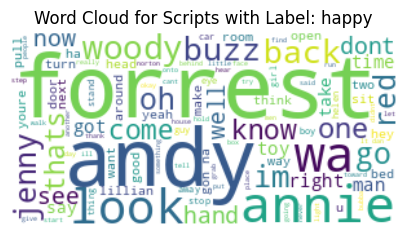

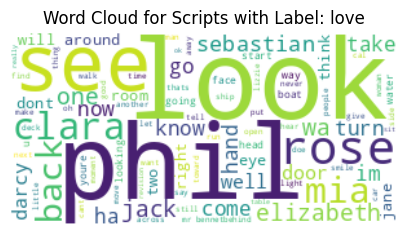

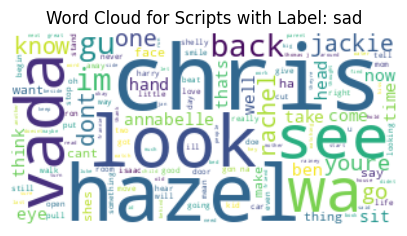

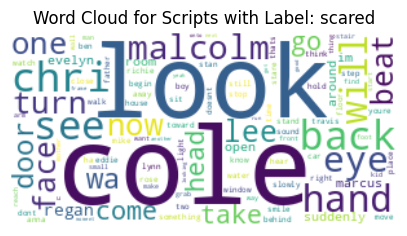

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('PreprocessedMoviesScripts1.csv')

def generate_wordcloud_for_labels():

    grouped_by_label = df.groupby('sentiment')['script'].apply(' '.join)

    for label, scripts in grouped_by_label.items():
        wordcloud = WordCloud(width=300, height=150, background_color='white').generate(scripts)

        plt.figure(figsize=(5, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Scripts with Label: {label}")
        plt.show()

generate_wordcloud_for_labels()

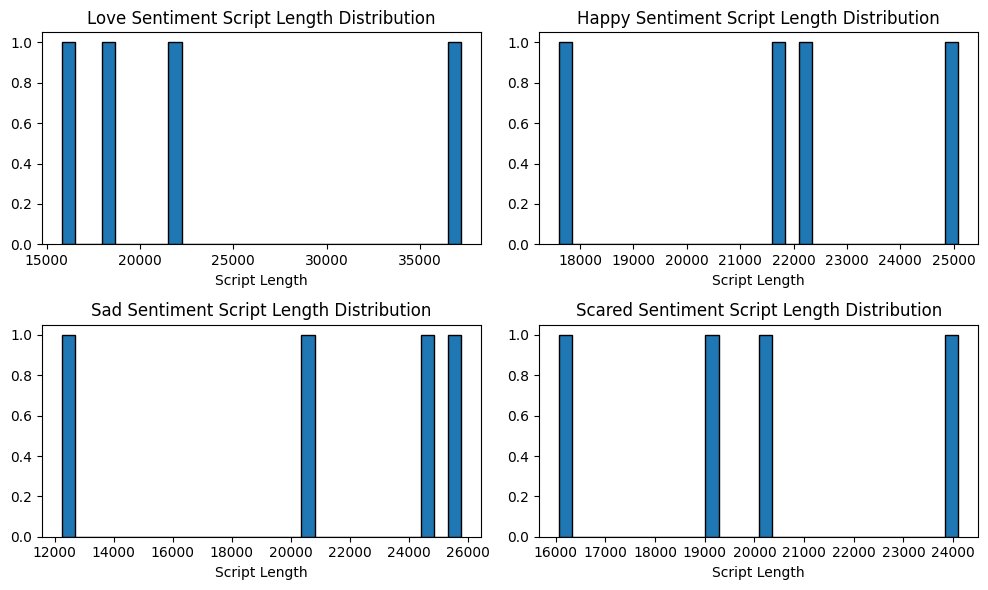

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('PreprocessedMoviesScripts1.csv')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sentiments = ['love', 'happy', 'sad', 'scared']

for i, sentiment in enumerate(sentiments):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df[df['sentiment'] == sentiment]['script'].apply(lambda x: len(x.split())), bins=30, edgecolor='black')
    axes[row, col].set_title(f'{sentiment.capitalize()} Sentiment Script Length Distribution')
    axes[row, col].set_xlabel('Script Length')

plt.tight_layout()

plt.show()

# **Machine Learning Model Training**

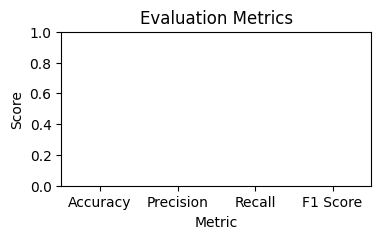

In [ ]:
# First Applying ML Model on dataset without preprossesing

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('MoviesScripts.csv')

test_script = "Look at this one of your Mom with me. I mean that woman can't contain her 'Love!"

test_sentiment = "love"

test_df_manual = pd.DataFrame({'script': [test_script], 'sentiment': [test_sentiment]})

warnings.filterwarnings("ignore")

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return " ".join(tokens)

test_df_manual['script'] = test_df_manual['script'].apply(preprocess_text)

train_df = df

tfidf_vectorizer = TfidfVectorizer(max_features=500000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['script'])
X_test_tfidf = tfidf_vectorizer.transform(test_df_manual['script'])

pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).to_csv('X_train_tfidf.csv', index=False)
pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).to_csv('X_test_tfidf.csv', index=False)

y_train = train_df['sentiment']
y_test = test_df_manual['sentiment']

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(4, 2))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

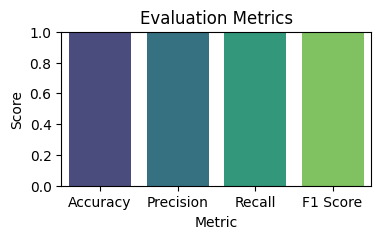

In [ ]:
# Applying ML Model on dataset with one of the preprossesing technique

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('PreprocessedMoviesScripts1.csv')

test_script = "Look at this one of your Mom with me. I mean that woman can't contain her Love!"

test_sentiment = "love"

test_df_manual = pd.DataFrame({'script': [test_script], 'sentiment': [test_sentiment]})

warnings.filterwarnings("ignore")

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return " ".join(tokens)

test_df_manual['script'] = test_df_manual['script'].apply(preprocess_text)

train_df = df

tfidf_vectorizer = TfidfVectorizer(max_features=500000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['script'])
X_test_tfidf = tfidf_vectorizer.transform(test_df_manual['script'])

pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).to_csv('X_train_tfidf.csv', index=False)
pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).to_csv('X_test_tfidf.csv', index=False)

y_train = train_df['sentiment']
y_test = test_df_manual['sentiment']

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(4, 2))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

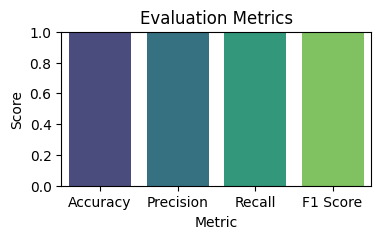

In [ ]:
# Applying ML Model on dataset with Bigram preprossesing technique

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('PreprocessedMoviesScripts2.csv')

test_script = "Look at this one of your Mom with me. I mean that woman can't contain her Love!"

test_sentiment = "love"

test_df_manual = pd.DataFrame({'script': [test_script], 'sentiment': [test_sentiment]})

warnings.filterwarnings("ignore")

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return " ".join(tokens)

test_df_manual['script'] = test_df_manual['script'].apply(preprocess_text)

train_df = df

tfidf_vectorizer = TfidfVectorizer(max_features=500000, ngram_range=(2, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['script'])
X_test_tfidf = tfidf_vectorizer.transform(test_df_manual['script'])

pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).to_csv('X_train_tfidf.csv', index=False)
pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).to_csv('X_test_tfidf.csv', index=False)

y_train = train_df['sentiment']
y_test = test_df_manual['sentiment']

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(4, 2))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Simply Predicting Sentiments

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

df = pd.read_csv('PreprocessedMoviesScripts2.csv')

test_script = "Sister Victoria looks over at the WINDOW. Stands and walks over. The rope slinking like a serpent behind her."

test_df_manual = pd.DataFrame({'script': [test_script]})

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return " ".join(tokens)

test_df_manual['script'] = test_df_manual['script'].apply(preprocess_text)

train_df = df

tfidf_vectorizer = TfidfVectorizer(max_features=500000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['script'])
X_test_tfidf = tfidf_vectorizer.transform(test_df_manual['script'])

y_train = train_df['sentiment']

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

predicted_sentiment = nb_model.predict(X_test_tfidf)

print("Predicted Sentiment Label:", predicted_sentiment[0])

Predicted Sentiment Label: scared


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

df = pd.read_csv('PreprocessedMoviesScripts1.csv')

test_script = "So we turned to the Church, Father. It's what my parents did when they hit a rough patch"

test_df_manual = pd.DataFrame({'script': [test_script]})

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return " ".join(tokens)

test_df_manual['script'] = test_df_manual['script'].apply(preprocess_text)

train_df = df

tfidf_vectorizer = TfidfVectorizer(max_features=500000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['script'])
X_test_tfidf = tfidf_vectorizer.transform(test_df_manual['script'])

y_train = train_df['sentiment']

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

predicted_sentiment = nb_model.predict(X_test_tfidf)

print("Predicted Sentiment Label:", predicted_sentiment[0])

Predicted Sentiment Label: scared


# **Deep Learning Model Training**

In [2]:
# Applying on Dataset without preprocessing

import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('MoviesScripts.csv')

max_words = 500000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['script'])
sequences = tokenizer.texts_to_sequences(df['script'])
padded_sequences = pad_sequences(sequences, padding='post', truncating='post')

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['sentiment'])
one_hot_labels = np.zeros((len(labels), len(set(labels))))
for i, label in enumerate(labels):
    one_hot_labels[i, label] = 1

embedding_dim = 100
num_classes = len(set(labels))
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(padded_sequences, one_hot_labels, epochs=5)

test_script = "You forgot to wash my purple shirt. told you a hundred times it was Purple Day at school today."
test_df_manual = pd.DataFrame({'script': [test_script]})

test_sequences = tokenizer.texts_to_sequences(test_df_manual['script'])
padded_test_sequences = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=padded_sequences.shape[1])

test_sentiment = "sad"

test_label = label_encoder.transform([test_sentiment])
one_hot_test_label = np.zeros((len(test_label), num_classes))
for i, label in enumerate(test_label):
    one_hot_test_label[i, label] = 1

accuracy = model.evaluate(padded_test_sequences, one_hot_test_label)[1]

print("Accuracy on Test Script:", accuracy)

Epoch 1/5
1/1 [==============================] - 756s 756s/step - loss: 1.3882 - accuracy: 0.2500
Epoch 2/5
1/1 [==============================] - 746s 746s/step - loss: 1.3795 - accuracy: 0.3125
Epoch 3/5
1/1 [==============================] - 741s 741s/step - loss: 1.3711 - accuracy: 0.3125
Epoch 4/5
1/1 [==============================] - 741s 741s/step - loss: 1.3626 - accuracy: 0.3125
Epoch 5/5
1/1 [==============================] - 7s 7s/step - loss: 1.2996 - accuracy: 1.0000
Accuracy on Test Script: 1.0


In [ ]:
# Applying DL Model on dataset with one of the preprossesing technique

import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('PreprocessedMoviesScripts1.csv')

max_words = 500000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['script'])
sequences = tokenizer.texts_to_sequences(df['script'])
padded_sequences = pad_sequences(sequences, padding='post', truncating='post')

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['sentiment'])
one_hot_labels = np.zeros((len(labels), len(set(labels))))
for i, label in enumerate(labels):
    one_hot_labels[i, label] = 1

embedding_dim = 100
num_classes = len(set(labels))
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(padded_sequences, one_hot_labels, epochs=5)

test_script = "You forgot to wash my purple shirt. told you a hundred times it was Purple Day at school today."
test_df_manual = pd.DataFrame({'script': [test_script]})

test_sequences = tokenizer.texts_to_sequences(test_df_manual['script'])
padded_test_sequences = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=padded_sequences.shape[1])

test_sentiment = "sad"

test_label = label_encoder.transform([test_sentiment])
one_hot_test_label = np.zeros((len(test_label), num_classes))
for i, label in enumerate(test_label):
    one_hot_test_label[i, label] = 1

accuracy = model.evaluate(padded_test_sequences, one_hot_test_label)[1]

print("Accuracy on Test Script:", accuracy)

Epoch 1/5
1/1 [==============================] - 666s 666s/step - loss: 1.3850 - accuracy: 0.1875
Epoch 2/5
1/1 [==============================] - 656s 656s/step - loss: 1.3758 - accuracy: 0.4375
Epoch 3/5
1/1 [==============================] - 659s 659s/step - loss: 1.3665 - accuracy: 0.7500
Epoch 4/5
1/1 [==============================] - 672s 672s/step - loss: 1.3568 - accuracy: 0.8125
Epoch 5/5
1/1 [==============================] - 8s 8s/step - loss: 1.3377 - accuracy: 1.0000
Accuracy on Test Script: 1.0


In [1]:
# Applying ML Model on dataset with Bigram preprossesing technique

import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('PreprocessedMoviesScripts2.csv')

max_words = 500000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['script'])
sequences = tokenizer.texts_to_sequences(df['script'])
padded_sequences = pad_sequences(sequences, padding='post', truncating='post')

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['sentiment'])
one_hot_labels = np.zeros((len(labels), len(set(labels))))
for i, label in enumerate(labels):
    one_hot_labels[i, label] = 1

embedding_dim = 100
num_classes = len(set(labels))
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(padded_sequences, one_hot_labels, epochs=5)

test_script = "You forgot to wash my purple shirt. told you a hundred times it was Purple Day at school today."
test_df_manual = pd.DataFrame({'bigram_script': [test_script]})

test_sequences = tokenizer.texts_to_sequences(test_df_manual['bigram_script'])
padded_test_sequences = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=padded_sequences.shape[1])

test_sentiment = "sad"

test_label = label_encoder.transform([test_sentiment])
one_hot_test_label = np.zeros((len(test_label), num_classes))
for i, label in enumerate(test_label):
    one_hot_test_label[i, label] = 1

accuracy = model.evaluate(padded_test_sequences, one_hot_test_label)[1]

print("Accuracy on Test Script:", accuracy)

Epoch 1/5
1/1 [==============================] - 678s 678s/step - loss: 1.3876 - accuracy: 0.1875
Epoch 2/5
1/1 [==============================] - 674s 674s/step - loss: 1.3788 - accuracy: 0.5625
Epoch 3/5
1/1 [==============================] - 685s 685s/step - loss: 1.3702 - accuracy: 0.7500
Epoch 4/5
1/1 [==============================] - 677s 677s/step - loss: 1.3612 - accuracy: 0.8125
Epoch 5/5
1/1 [==============================] - 9s 9s/step - loss: 1.3331 - accuracy: 1.0000
Accuracy on Test Script: 1.0


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('PreprocessedMoviesScripts1.csv')

max_words = 500000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['script'])
sequences = tokenizer.texts_to_sequences(df['script'])
padded_sequences = pad_sequences(sequences, padding='post', truncating='post')

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['sentiment'])

one_hot_labels = np.zeros((len(labels), len(set(labels))))
for i, label in enumerate(labels):
    one_hot_labels[i, label] = 1

embedding_dim = 100
num_classes = len(set(labels))
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(padded_sequences, one_hot_labels, epochs=5)

test_script = "So we turned to the Church, Father. It's what my parents did when they hit a rough patch"

test_sequence = tokenizer.texts_to_sequences([test_script])

padded_test_sequence = pad_sequences(test_sequence, padding='post', truncating='post', maxlen=padded_sequences.shape[1])

predicted_prob = model.predict(padded_test_sequence)
predicted_sentiment = label_encoder.inverse_transform([np.argmax(predicted_prob)])[0]

print("Predicted Sentiment Label:", predicted_sentiment)

Epoch 1/5
1/1 [==============================] - 630s 630s/step - loss: 1.3892 - accuracy: 0.2500
Epoch 2/5
1/1 [==============================] - 650s 650s/step - loss: 1.3797 - accuracy: 0.4375
Epoch 3/5
1/1 [==============================] - 638s 638s/step - loss: 1.3703 - accuracy: 0.5625
Epoch 4/5
1/1 [==============================] - 625s 625s/step - loss: 1.3606 - accuracy: 0.7500
Epoch 5/5
1/1 [==============================] - 6s 6s/step
Predicted Sentiment Label: scared


# **Data Visualization**

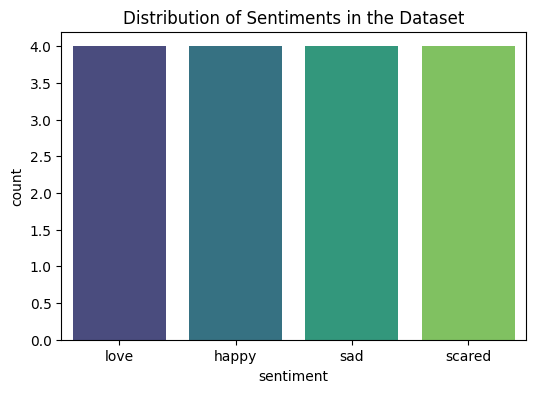

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('PreprocessedMoviesScripts1.csv')

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in the Dataset')
plt.show()

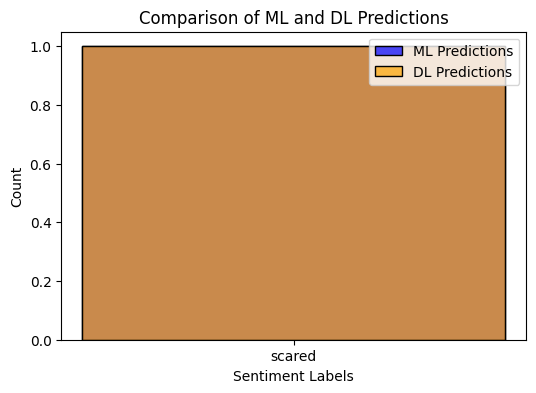

In [ ]:
# Visualize the comparison between ML and DL predictions

ml_predictions = ['scared']
dl_predictions = ['scared']
plt.figure(figsize=(6, 4))
sns.histplot(ml_predictions, label='ML Predictions', kde=True, color='blue', alpha=0.7)
sns.histplot(dl_predictions, label='DL Predictions', kde=True, color='orange', alpha=0.7)
plt.title('Comparison of ML and DL Predictions')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.legend()
plt.show()

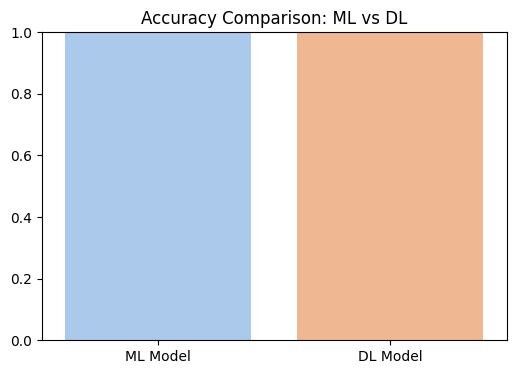

In [ ]:
# Visualize the accuracy of ML and DL models

accuracy_ml = 1
accuracy_dl = 1

plt.figure(figsize=(6, 4))
sns.barplot(x=['ML Model', 'DL Model'], y=[accuracy_ml, accuracy_dl], palette='pastel')
plt.title('Accuracy Comparison: ML vs DL')
plt.ylim(0, 1)
plt.show()